In [2]:
def sub(a,b,c,d):
  b = a + d
  a = c
  d = d + 1
  return

x = 1
y = 2
sub(x,y,x+y,y)
print(x , y)



1 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


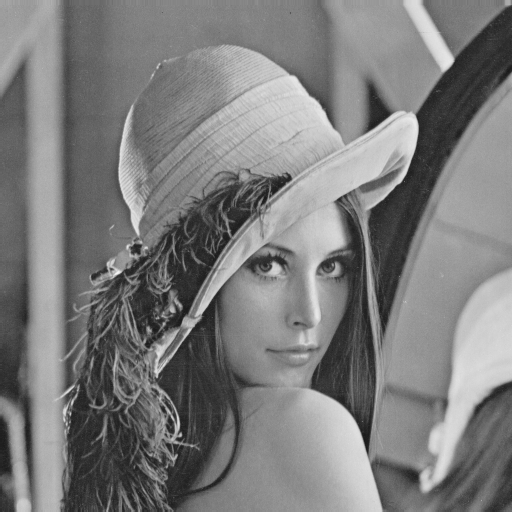

In [ ]:
##import matplotlib.pyplot as plt
#import matplotlib.image as img
from PIL import Image
# Load an image
originalImage = Image.open('/content/drive/MyDrive/digImage/lena_gray.gif')
ditheringImage = originalImage.convert("L")
#pixels = ditheringImage.load()
# Display the loaded image

#plt.axis('off')  # Hide axis labels and ticks (optional)
# width, height = originalImage.size

# # Print the size
# print(f"Image size: {width} x {height} pixels")
# gray_value = ditheringImage.getpixel((12, 12))

# # # Create an RGB tuple with the grayscale value
# rgb_value = (gray_value, gray_value, gray_value)

# # # Print or use the RGB value
# print("RGB value:", rgb_value)
# Show the image
originalImage


In [ ]:
from skimage import io
import skimage.transform as tr
img = io.imread('/content/drive/MyDrive/digImage/lena_gray.gif')
x4 = tr.rescale(tr.rescale(x,0.25),4,order=0)
x4

AttributeError: ignored

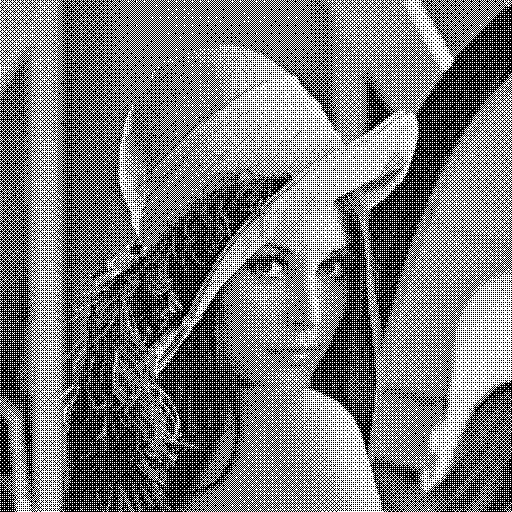

In [ ]:
DitherArray_old = [
    [0, 32, 8, 40, 2, 34, 10, 42],
    [48, 16, 56, 24, 50, 18, 58, 26],
    [12, 44, 4, 36, 14, 46, 6, 38],
    [60, 28, 52, 20, 62, 30, 54, 22],
    [3, 35, 11, 43, 1, 33, 9, 41],
    [51, 19, 59, 27, 49, 17, 57, 25],
    [15, 47, 7, 39, 13, 45, 5, 37],
    [63, 31, 55, 23, 61, 29, 53, 21]
]



DitherArray = []
for row in DitherArray_old:
  new_row =[]
  for element in row:
    new_element = (element+1) /64
    new_row.append(new_element)
  DitherArray.append(new_row)

for i in range(0,512,8):
  for j in range(0,512,8):
    for x in range(8):
      for y in range(8):
        temp = ditheringImage.getpixel((i+x,j+y))/255
        if temp > DitherArray[x][y]:
          ditheringImage.putpixel((i+x, j+y), 255)
        else:
          ditheringImage.putpixel((i+x, j+y), 0)
#plt.imshow(ditheringImage)
ditheringImage
# gray_value = ditheringImage.getpixel((12, 12))

# # Create an RGB tuple with the grayscale value
# rgb_value = (gray_value, gray_value, gray_value)

# # Print or use the RGB value
# print("RGB value:", rgb_value)

In [ ]:
# bayer_matrix = [
#     [0, 48, 12, 60, 3, 51, 15, 63],
#     [32, 16, 44, 28, 35, 19, 47, 31],
#     [8, 56, 4, 52, 11, 59, 7, 55],
#     [40, 24, 36, 20, 43, 27, 39, 23],
#     [2, 50, 14, 62, 1, 49, 13, 61],
#     [34, 18, 46, 30, 33, 17, 45, 29],
#     [10, 58, 6, 54, 9, 57, 5, 53],
#     [42, 26, 38, 22, 41, 25, 37, 21]
# ]

# DitherArray = [
#     [0.567, 0.635, 0.608, 0.514, 0.424, 0.365, 0.392, 0.486],
#     [0.847, 0.878, 0.910, 0.698, 0.153, 0.122, 0.090, 0.302],
#     [0.820, 0.969, 0.941, 0.667, 0.180, 0.031, 0.059, 0.333],
#     [0.725, 0.788, 0.757, 0.545, 0.275, 0.212, 0.243, 0.455],
#     [0.424, 0.365, 0.392, 0.486, 0.567, 0.635, 0.608, 0.514],
#     [0.153, 0.122, 0.090, 0.302, 0.847, 0.878, 0.910, 0.698],
#     [0.180, 0.031, 0.059, 0.333, 0.820, 0.969, 0.941, 0.667],
#     [0.275, 0.212, 0.243, 0.455, 0.725, 0.788, 0.757, 0.545]
# ]

## ERROR DIFFUSION

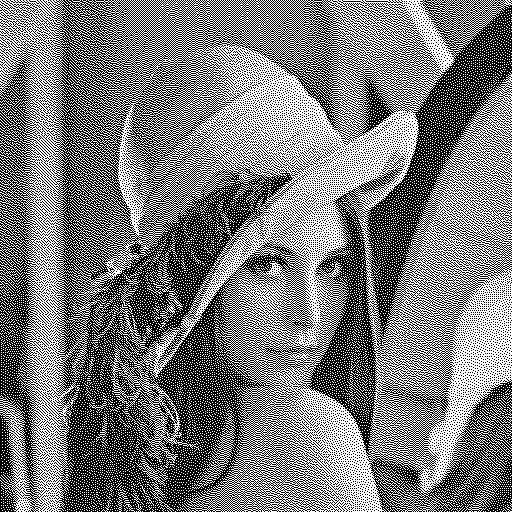

In [ ]:
error_diffusion_image = originalImage.convert("L")
error_array = [
    [0.0,0.0, 0.4375],
    [0.1875, 0.3125, 0.062]
]

for i in range(512):
  for j in range(512):
    current_pixel = error_diffusion_image.getpixel((i,j))
    if current_pixel < 128:
      error_value = current_pixel
      error_diffusion_image.putpixel((i, j), 0)
    else:
      error_value = current_pixel - 255
      error_diffusion_image.putpixel((i, j), 255)
    for x in range(2):
      if i+x > 511:
        continue
      for y in range(-1,2):
        if j+y < 0 or j+y > 511:
          continue
        if error_array[x][y+1] == 0:
          continue
        weightvalue = error_value * error_array[x][y+1]
        result = int(weightvalue + error_diffusion_image.getpixel((i+x,j+y)))
        result = result if result < 256 else 255
        error_diffusion_image.putpixel((i+x, j+y), result)

error_diffusion_image




## DOT DIFFUSION

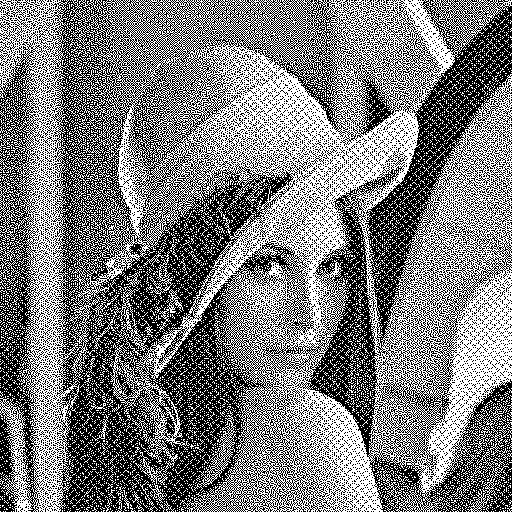

In [ ]:
dot_diffusion_image = originalImage.convert("L")

#宣告點擴散法中的擴散順序矩陣:
ClassMatrix = [
    [34, 48, 40, 32, 29, 15, 23, 31],
    [42, 58, 56, 53, 21, 5, 7, 10],
    [50, 62, 61, 45, 13, 1, 2, 18],
    [38, 46, 54, 37, 25, 17, 9, 26],
    [28, 14, 22, 30, 35, 49, 41, 33],
    [20, 4, 6, 11, 43, 59, 57, 52],
    [12, 0, 3, 19, 51, 63, 60, 44],
    [24, 16, 8, 27, 39, 47, 55, 36]
]
#宣告點擴散法中的擴散權重矩陣
ErrorArray = [
    [1, 2, 1],
    [2, 0, 2],
    [1, 2, 1]
]

error_value = 0

for k in range(64):
  for i in range(0,512,8):
    for j in range(0,512,8):
      for x in range(8):
        for y in range(8):
          if(k == ClassMatrix[x][y]):
            current_pixel = dot_diffusion_image.getpixel((i+x,j+y))
            if current_pixel < 128:
              error_value = current_pixel
              dot_diffusion_image.putpixel((i+x,j+y), 0)
            else:
              error_value = current_pixel - 255
              dot_diffusion_image.putpixel((i+x,j+y), 255)
            weightSum = 0
            for p in range(-1,2):
              if i+x < 0 or i+x > 511:
                continue
              for q in range(-1,2):
                if j+y+q < 0 or j+y+q > 511:
                  continue
                index_x = (x+p)%8
                index_y = (y+q)%8
                index_x = 8 + index_x if index_x < 0 else index_x
                index_y = 8 + index_y if index_y < 0 else index_y
                if ClassMatrix[index_x][index_y] > k:
                  weightSum += ErrorArray[p+1][q+1]
            for p in range(-1,2):
              if i+x < 0 or i+x > 511:
                continue
              for q in range(-1,2):
                if j+y+q < 0 or j+y+q > 511:
                  continue
                index_x = (x+p)%8
                index_y = (y+q)%8
                index_x = 8 + index_x if index_x < 0 else index_x
                index_y = 8 + index_y if index_y < 0 else index_y
                if ClassMatrix[index_x][index_y] > k and weightSum!=0:
                  result = dot_diffusion_image.getpixel((i+index_x,j+index_y)) + int(error_value * ErrorArray[p+1][q+1] /weightSum)
                  dot_diffusion_image.putpixel((i+index_x,j+index_y), result)

dot_diffusion_image



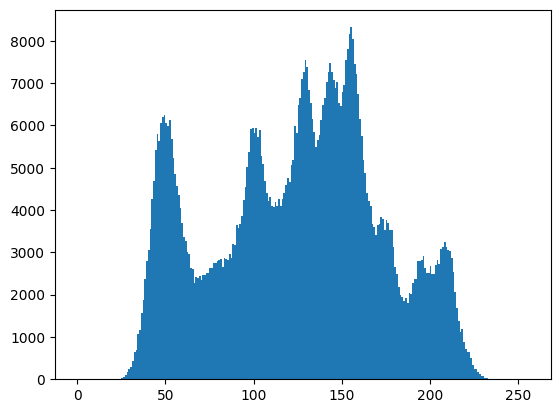

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
# 讀取圖檔
img = cv2.imread('/content/drive/MyDrive/digImage/gray.jpg')

# 轉為灰階圖片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 計算直方圖每個 bin 的數值
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# 畫出直方圖
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
from PIL import Image
import numpy as np
img = originalImage
indexed = np.array(img)
palette = img.getpalette()# 決定顏色數
num_colors = len(palette)// 3# 決定影像最大索引值
max_val = float(np.iinfo(indexed.dtype).max)# 產生色盤矩陣
palette = np.array(palette).reshape(num_colors, 3)
map = np.array(palette).reshape(num_colors, 3) / max_val
print(max_val)

255.0
